In [2]:
import sys, pathlib 
sys.path.append(str(pathlib.Path().resolve().parent / "src"))


import numpy as np 
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt

from qp.metrics import sharpe



In [3]:
tickers = ["SPY", "EFA", "EEM", "AGG", "GLD"]
start = "2020-01-01"

px = yf.download(tickers, start=start, auto_adjust=True, progress=False)["Close"]
ret = px.pct_change(fill_method=None).dropna()
ret.tail()

Ticker,AGG,EEM,EFA,GLD,SPY
Date,,,,,
2025-08-29,-0.001305,-0.004790,-0.005868,0.009650,-0.005964
2025-09-02,-0.002653,-0.000802,-0.009838,0.023643,-0.007410
2025-09-03,0.003641,0.003814,0.001546,0.007832,0.005420
2025-09-04,0.004031,-0.003199,0.007275,-0.004419,0.008357
2025-09-05,0.004717,0.012036,0.004487,0.013346,-0.002896


In [4]:
rf_annual = 0.04 
rf_daily = rf_annual / 252

sharpe_vals = ret.apply(lambda r: sharpe(r.values, risk_free=rf_daily))
sharpe_vals.sort_values(ascending=False)

Ticker
GLD    0.753485
SPY    0.561119
EFA    0.281698
EEM    0.102292
AGG   -0.465334
dtype: float64

In [11]:

# ^IRX laden (annualisiert in %) -> daily (Dezimal) & auf ret-Index ausrichten
irx = yf.download("^IRX", start=start, progress=False)["Close"] / 100.0
rf_daily_series = irx.reindex(ret.index).ffill() / 252  
rf_vec = getattr(rf_daily_series, "squeeze", lambda: rf_daily_series)()
rf_vec = rf_vec.to_numpy().reshape(-1) 


print("ret:", ret.shape, "rf_vec:", rf_vec.shape)


sharpe_irx = ret.apply(lambda col: sharpe(col.to_numpy(), risk_free=rf_vec, ddof=1))
sharpe_irx.sort_values(ascending=False)

ret: (1426, 5) rf_vec: (1426,)


C:\Users\Luca\AppData\Local\Temp\ipykernel_9704\501491191.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  irx = yf.download("^IRX", start=start, progress=False)["Close"] / 100.0


Ticker
GLD    0.837110
SPY    0.623870
EFA    0.348842
EEM    0.162536
AGG   -0.265982
dtype: float64

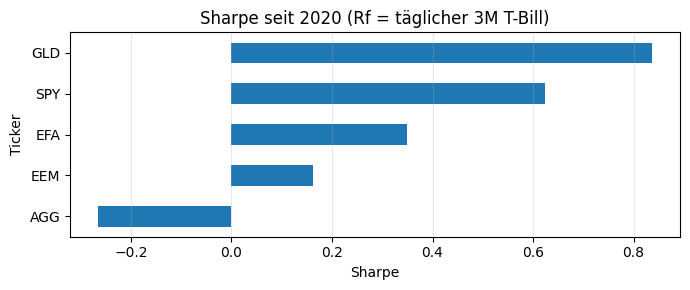

In [13]:
ax = sharpe_irx.sort_values().plot(kind="barh", figsize=(7,3),
                                   title="Sharpe seit 2020 (Rf = täglicher 3M T-Bill)")
ax.set_xlabel("Sharpe"); ax.grid(True, axis="x", alpha=0.3)
plt.tight_layout(); plt.show()